In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

from util import create_adv_example, unpack_tree

In [21]:
np.random.seed(0)

num_classes = 2
X = pd.read_csv(
    "https://raw.githubusercontent.com/gov-ind/datasets/main/loan_default_processed.csv",
    index_col=0
)
print(X.iloc[:5,-7:])

y = X['status']
X_ = X.drop('status', axis=1)

cols = X.columns

X = np.array(X_)
y = np.array(y)

clf = DecisionTreeClassifier(random_state=0, max_depth=4)
model = clf.fit(X, y)

         term  property_value   income  Credit_Score        LTV  dtir1  status
104725  360.0        308000.0   7020.0           839  81.250000   37.0       1
22719   360.0        928000.0  14640.0           544  69.665948   29.0       0
119349  180.0        418000.0  12780.0           812  66.148325   30.0       0
95438   360.0        278000.0   3480.0           757  77.877698   49.0       0
47958   360.0        638000.0   8220.0           664  79.388715   30.0       0


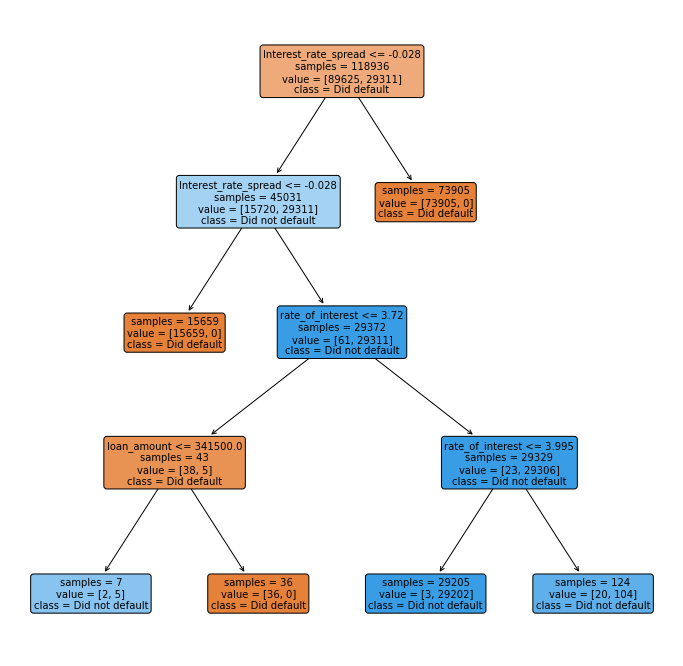

In [23]:
plt.figure(figsize=(12,12))
_ = tree.plot_tree(clf, 
                   feature_names=X_.columns,  
                   class_names=["Did default", "Did not default"],
                   filled=True,
                   rounded=True,
                   impurity=False,
                   fontsize=10)
plt.show()

In [3]:
sample = X[0]
actual_label = clf.predict([sample])[0]

root, feature, threshold = unpack_tree(clf)
target_cls = 0

adv_sample = create_adv_example(
    clf,
    sample,
    target_cls=target_cls
)

assert clf.predict([adv_sample])[0] == target_cls

mask = sample != adv_sample

for feature, v1, v2 in zip(cols[mask], sample[mask], adv_sample[mask]):
    print(f"Modified feature: {feature}, Old: {v1}, New: {v2}")

Modified feature: rate_of_interest, Old: 3.99, New: 3.8115
Modified feature: dtir1, Old: 37.0, New: 35.499
